## Machine Learnining: Lab and HW 10
### Homework Tasks:
* Plot the error
* Model XOR with the help of sigmoid, linear
* Add moments rule to learning equation


In [1]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

def linear(x):
    return x

def linear_prime(x):
    return 1


In [2]:
import numpy as np


class NeuralNetwork:

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
#         self.activation = linear
#         self.activation_prime = linear_prime
#         self.activation = sigmoid
#         self.activation_prime = sigmoid_prime
        
        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn.predict(e))
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

[[-0.44421228 -0.64704616 -0.8955926 ]
 [ 0.36475037 -0.52486431  0.72622164]
 [-0.79659617 -0.54408448 -0.29470953]]
[[-0.12120519]
 [-0.30914795]
 [-0.40255416]]
[0 0] [0.47317639]
[0 1] [0.60039991]
[1 0] [0.32045894]
[1 1] [0.50024965]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [-8.11325462e-06]
[0 1] [0.99580922]
[1 0] [0.99731794]
[1 1] [0.00199647]


[[-0.98877865 -0.64946173  0.6853109 ]
 [-0.97375774  0.71511282 -0.56167209]
 [ 0.56190879  0.7523036   0.05302981]]
[[ 0.67928614]
 [ 0.07360711]
 [-0.63422268]]
[0 0] [0.23973948]
[0 1] [0.32067548]
[1 0] [0.19675414]
[1 1] [0.2682996]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [0.49943046]
[0 1] [0.50030777]
[1 0] [0.50017215]
[1 1] [0.50104946]


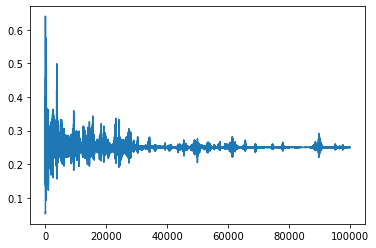

In [4]:
import matplotlib.pyplot as plt
import numpy as np
class XOR:
    def __init__(self, layers):
        self.activation_linear = linear
        self.activation_linear_prime = linear_prime
        self.activation_sigmoid = sigmoid
        self.activation_sigmoid_prime = sigmoid_prime
        
        # Set weights
        self.weights = []
        self.moments = []
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            self.moments.append(np.zeros(r.shape))
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)
        self.moments.append(np.zeros(r.shape))

    def fit(self, X, y, learning_rate=0.2, epochs=100000, gamma=0.1):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        errs = []
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            
            for l in range(len(self.weights)-1):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation_linear(dot_value)
                    a.append(activation)
            a.append(self.activation_sigmoid(np.dot(a[-1], self.weights[-1])))
            # output layer
            error = y[i] - a[-1]
            errs.append(error**2)
            deltas = [error * self.activation_sigmoid_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_linear_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                prev_weight = np.copy(self.weights[i])
                self.weights[i] += learning_rate * layer.T.dot(delta) + gamma*self.moments[i]
                self.moments[i] = self.weights[i]-prev_weight

            if k % 10000 == 0: 
                print('epochs:', k)
                
        return errs

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(len(self.weights)-1):
            a = self.activation_linear(np.dot(a, self.weights[l]))
        return self.activation_sigmoid(np.dot(a, self.weights[-1]))

if __name__ == '__main__':

    nn = XOR([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    epochs = 100000
    for e in X:
        print(e,nn.predict(e))
    errors = nn.fit(X, y, epochs=epochs, learning_rate=0.2, gamma=0.1)
    for e in X:
        print(e,nn.predict(e))
        
    plt.plot(np.arange(epochs), errors)

In [5]:
errors

[array([0.05747502]),
 array([0.05469192]),
 array([0.05177057]),
 array([0.48113664]),
 array([0.4551842]),
 array([0.6405356]),
 array([0.06982022]),
 array([0.41144208]),
 array([0.39321753]),
 array([0.37472507]),
 array([0.08092571]),
 array([0.5583559]),
 array([0.15819116]),
 array([0.52348797]),
 array([0.16800409]),
 array([0.35498266]),
 array([0.16282976]),
 array([0.35019752]),
 array([0.15636538]),
 array([0.0966614]),
 array([0.14053493]),
 array([0.35845205]),
 array([0.09322462]),
 array([0.34936986]),
 array([0.33735413]),
 array([0.09644309]),
 array([0.32719115]),
 array([0.15292675]),
 array([0.32258068]),
 array([0.14670407]),
 array([0.31840363]),
 array([0.55622057]),
 array([0.51045892]),
 array([0.11798842]),
 array([0.46837572]),
 array([0.20333936]),
 array([0.4436305]),
 array([0.40983636]),
 array([0.13891746]),
 array([0.22748454]),
 array([0.29758741]),
 array([0.39336603]),
 array([0.36321399]),
 array([0.28629179]),
 array([0.25654927]),
 array([0.15240